In [1]:
import json
import plotly.graph_objects as go

from glob import glob

import sys
sys.path.append('../../Data/auxiliary/')

In [2]:
def replace_special_char(string):
    changes = [('á', 'a'), ('à', 'a'), ('â', 'a'), ('ã', 'a'),
               ('é', 'e'), ('ê', 'e'), ('í', 'i'), ('ó', 'o'),
               ('ô', 'o'), ('õ', 'o'), ('ú', 'u'), ('ç', 'c')]
    
    for change in changes: string = string.replace(change[0], change[1])
    return string

In [3]:
summary = dict()
for file in sorted(glob('../../Data/results/processed/Serie_A_*_squads.json')):
    year = int(file[-16:-12])
    if year == 2024: continue
    summary[year] = dict()
    info_file = file.replace('squads', 'games')
    with open(file, 'rb') as f: data = json.load(f)
    with open(info_file, 'rb') as f: info = json.load(f)
    for game in data:
        home_club = info[game]['Home']
        away_club = info[game]['Away']
        if home_club not in summary[year]: summary[year][home_club] = set()
        if away_club not in summary[year]: summary[year][away_club] = set()
        for sub_game in data[game]:
            home_squad = data[game][sub_game]['Home']['Squad']
            away_squad = data[game][sub_game]['Away']['Squad']
            summary[year][home_club] = summary[year][home_club].union(set(home_squad))
            summary[year][away_club] = summary[year][away_club].union(set(away_squad))

for year in summary:
    for club in summary[year]:
        summary[year][club] = len(summary[year][club])
    
    summary[year] = sum(summary[year].values()) / len(summary[year])


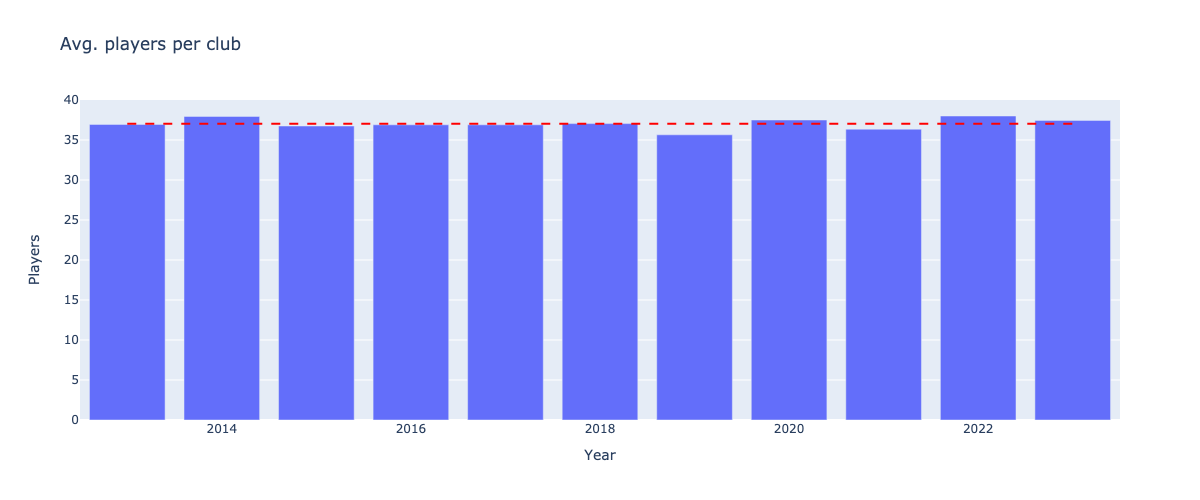

In [4]:
year = list(summary.keys())
value = list(summary.values())
mean = sum(value) / len(value)

fig = go.Figure()
fig.add_trace(go.Bar(x=year, y=value))
fig.add_shape(type='line', x0=year[0], y0=mean, x1=year[-1], y1=mean,
              line=dict(color='red', width=2, dash='dash'))

fig.update_layout(title='Avg. players per club',
                  xaxis_title='Year',
                  yaxis_title='Players',
                  showlegend=False)

fig.show('png', width=1200)

In [5]:
summary = dict()
for file in sorted(glob('../../Data/results/processed/Serie_A_*_squads.json')):
    year = int(file[-16:-12])
    if year == 2024: continue
    info_file = file.replace('squads', 'games')
    with open(file, 'rb') as f: data = json.load(f)
    with open(info_file, 'rb') as f: info = json.load(f)
    for game in data:
        home_club = info[game]['Home']
        away_club = info[game]['Away']
        if home_club not in summary: summary[home_club] = dict()
        if away_club not in summary: summary[away_club] = dict()
        if year not in summary[home_club]: summary[home_club][year] = set()
        if year not in summary[away_club]: summary[away_club][year] = set()
        for sub_game in data[game]:
            home_squad = set(data[game][sub_game]['Home']['Squad'])
            away_squad = set(data[game][sub_game]['Away']['Squad'])
            summary[home_club][year] = summary[home_club][year].union(home_squad)
            summary[away_club][year] = summary[away_club][year].union(away_squad)

for club in summary:
    for year in summary[club]:
        summary[club][year] = len(summary[club][year])
    
    summary[club] = sum(summary[club].values()) / len(summary[club])

summary

{'Vasco da Gama / RJ': 39.42857142857143,
 'Portuguesa / SP': 38.0,
 'Fluminense / RJ': 36.36363636363637,
 'Athletico Paranaense / PR': 36.63636363636363,
 'Corinthians / SP': 34.18181818181818,
 'Botafogo / RJ': 37.666666666666664,
 'Vitória / BA': 40.0,
 'Internacional / RS': 37.7,
 'Grêmio / RS': 38.6,
 'Náutico / PE': 41.0,
 'Ponte Preta / SP': 39.25,
 'São Paulo / SP': 35.27272727272727,
 'Criciúma / SC': 46.0,
 'Bahia / BA': 35.375,
 'Cruzeiro / MG': 36.25,
 'Goiás / GO': 38.714285714285715,
 'Coritiba / PR': 41.875,
 'Atlético Mineiro / MG': 34.63636363636363,
 'Santos / SP': 38.18181818181818,
 'Flamengo / RJ': 35.81818181818182,
 'Figueirense / SC': 39.666666666666664,
 'Sport / PE': 33.857142857142854,
 'Palmeiras / SP': 36.6,
 'Chapecoense / SC': 37.142857142857146,
 'Joinville / SC': 46.0,
 'Avaí / SC': 38.0,
 'Santa Cruz / PE': 41.0,
 'América / MG': 39.8,
 'Atlético / GO': 32.75,
 'Paraná / PR': 50.0,
 'Ceará / CE': 37.2,
 'CSA / AL': 40.0,
 'Fortaleza / CE': 31.2,
 'Red